<a href="https://colab.research.google.com/github/icaroyure/Dio_Desafio_Santander_Bootcamp_2023/blob/main/Dio_Desafio_Bootcamp_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Entendendo o Projeto

#### Este exercício tem como objetivo finalizar o módulo de manipulação e análise de dados do Bootcamp Santander 2023.
Apesar de simples em sua confecção, a finalidade maior deste desafio é demonstrar o potencial da linguagem python para todo o processo que envolve a ETL (Extract, Transform and Load).

Pensando nisso fiz uma análise a partir de dados fictícios de uma Loja de Discos especializada em vendas de Música Brasileira e Jazz/Hip-Hop. Apesar de simples manipulações e visualizações já é possível vislumbar um leque de possibilidades sobre as informações dispostas acerca dos dados analisados.

### Extract

In [ ]:
#importando biblioteca

import pandas as pd

loja_discos = pd.read_csv('loja_discos.csv', encoding="ISO-8859-1")

#conferindo dataframe gerado
loja_discos.head()



,id_cliente,nome_cliente,telefone,total_consumido,ticket_medio,data_ultima_compra,consumiu_musica_brasileira,consumiu_jazz_hip_hop_internacional,categoria_produto
0,1,Colleen Berry,124883108,266.106728,249.27,2023-02-10,Não,Sim,Jazz/Hip Hop Internacional
1,2,Katherine Jones,753514460,390.769899,79.71,2023-03-19,Não,Não,Outros
2,3,Courtney Smith,304192223,258.407721,31.31,2023-07-07,Não,Sim,Jazz/Hip Hop Internacional
3,4,Martin Scott,446055587,34.260506,5.21,2023-01-02,Não,Não,Outros
4,5,Mr. Cody Gutierrez,949365886,342.769470,112.75,2023-10-02,Não,Sim,Jazz/Hip Hop Internacional


### Insert

In [ ]:
#Calculando o Total de Vendas por Produto

total_vendas_por_categoria = loja_discos.groupby('categoria_produto')['total_consumido'].sum()
total_vendas_por_categoria.head()

#Extraindo o mês da coluna "data_ultima_compra"

loja_discos['Mes'] = pd.to_datetime(loja_discos['data_ultima_compra']).dt.month

#Calculando o Total de vendas por Mês

total_vendas_mes = loja_discos.groupby('Mes')['total_consumido'].sum()

#Visualizando os resultados das transformações

print('Vendas totais por Produto:')
print(total_vendas_por_categoria)

print('Vendas mensais:')
print(total_vendas_mes)

Vendas totais por Produto:
categoria_produto
Jazz/Hip Hop Internacional    2181.379064
Música Brasileira             1182.601471
Outros                        1313.793277
Name: total_consumido, dtype: float64
Vendas mensais:
Mes
1     896.937873
2     266.106728
3     427.055913
4      59.184832
5     326.105759
6     924.737897
7     258.407721
8     636.047842
9     243.513184
10    342.769470
12    296.906593
Name: total_consumido, dtype: float64


### Load

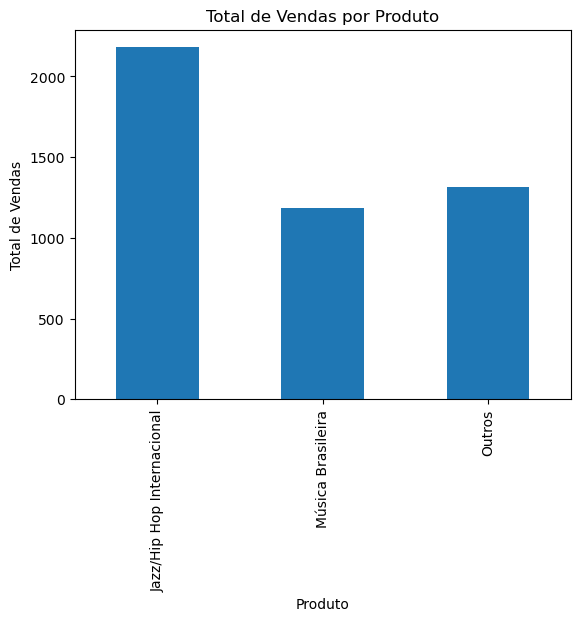

In [ ]:
#Visualizando dados gerados

import matplotlib.pyplot as plt

# Criando Gráfico de Barras
total_vendas_por_categoria.plot(kind='bar')
plt.xlabel('Produto')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Produto')
plt.show()


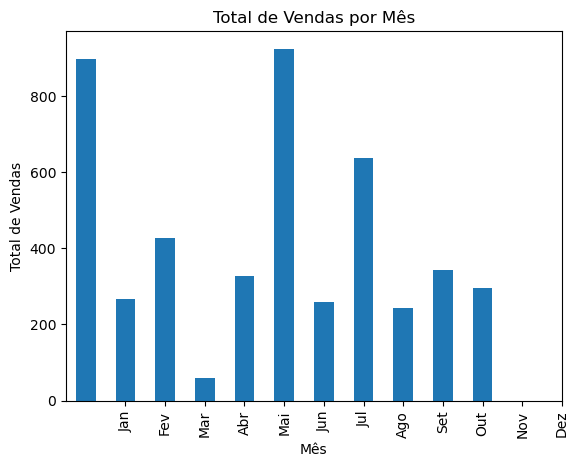

In [ ]:
#criando segundo gráfico de barras para melhor entendimento dos dados analisados

total_vendas_mes.plot(kind='bar')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Mês')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()